In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv(r"C:\Users\Marina\Downloads\weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-08,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,no,N
1,02-12-08,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,no,N
2,03-12-08,albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,no,Y
3,04-12-08,albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,no,No
4,05-12-08,albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,no,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145440 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
df.shape

(145460, 23)

In [5]:
df.nunique()

Date             3436
Location           50
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           4
RainTomorrow        4
dtype: int64

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [7]:
df.isnull()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
145456,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
145457,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
145458,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Date                 0
Location            20
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [9]:
df['RainTomorrow'].isnull().sum()

3267

In [10]:
df['RainTomorrow'].unique()

array(['N', 'Y', 'No', 'Yes', nan], dtype=object)

In [11]:
df['RainTomorrow']=df['RainTomorrow'].replace('N','No')
df['RainTomorrow']=df['RainTomorrow'].replace('Y','Yes')

df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [12]:
df['RainTomorrow'].value_counts()

No     110315
Yes     31878
Name: RainTomorrow, dtype: int64

In [13]:
RainTomorrowCounts={"Yes":31877,
             'No':110316,
             'Missing values':3267}

In [14]:
for key,value in RainTomorrowCounts.items():
    print(key ,':', value/len(df))

Yes : 0.21914615701911178
No : 0.7583940602227417
Missing values : 0.02245978275814657


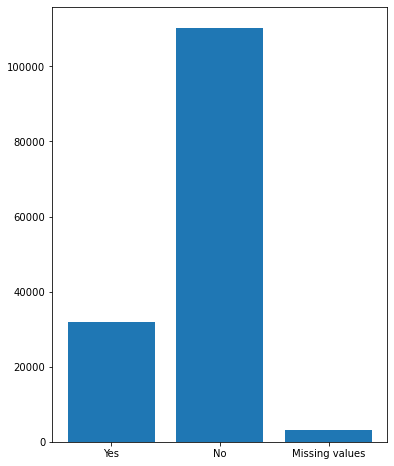

In [15]:
plt.ax =plt.subplots(figsize=(6,8))
names = list(RainTomorrowCounts.keys())
values = list(RainTomorrowCounts.values())

plt.bar(range(len(RainTomorrowCounts)), values, tick_label=names)
plt.show()

In [16]:
df['RainTomorrow']=df['RainTomorrow'].fillna('No')

In [17]:
df['RainTomorrow'].isnull().sum()

0

In [18]:
df['RainTomorrow'].value_counts()

No     113582
Yes     31878
Name: RainTomorrow, dtype: int64

In [19]:
RainTomorrow={'Yes':31877,'No':113582}
for key,value in RainTomorrow.items():
    print(key ,':', value/len(df))

Yes : 0.21914615701911178
No : 0.780846968238691


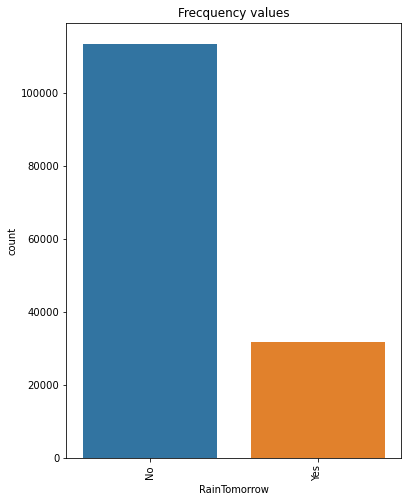

In [20]:
plt.ax =plt.subplots(figsize=(6,8))
ax=sns.countplot(x='RainTomorrow',data=df)
plt.xticks(rotation=90)
plt.title('Frecquency values');

In [21]:
df['RainTomorrow']=df['RainTomorrow'].replace('No',0)
df['RainTomorrow']=df['RainTomorrow'].replace('Yes',1)

In [22]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date',inplace= True,axis=1)

In [23]:
df['Year']=df['Year'].astype(int)
df['Month']=df['Month'].astype(int)
df['Day']=df['Day'].astype(int)

In [24]:
sns.pointplot(data=df, x="Location", y="Rainfall", ci = None);

In [25]:
locDum=pd.get_dummies(df.Location,prefix='Location').astype(int)

In [26]:
df = pd.concat([df,locDum],axis=1)

In [27]:
df.drop('Location', axis=1, inplace=True)

In [28]:
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [29]:
df['WindGustDir'].value_counts()

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64

In [30]:
df['WindGustDir'].fillna('W')

0           W
1         WNW
2         WSW
3          NE
4           W
         ... 
145455      E
145456    NNW
145457      N
145458     SE
145459      W
Name: WindGustDir, Length: 145460, dtype: object

In [31]:
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [32]:
df['WindGustDirFinal'] = df['WindGustDir'].astype(str).str[0]

In [33]:
WGD_DUM=pd.get_dummies(df.WindGustDirFinal,prefix='WindGustDir').astype(int)

In [34]:
df = pd.concat([df,WGD_DUM],axis=1)

In [35]:
df.drop('WindGustDir', axis=1, inplace=True)
df.drop('WindGustDirFinal', axis=1, inplace=True)

In [36]:
df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [37]:
df['WindDir9am'].value_counts()

N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64

In [38]:
df['WindDir9am'].fillna('N')

0           W
1         NNW
2           W
3          SE
4         ENE
         ... 
145455     SE
145456     SE
145457     SE
145458    SSE
145459    ESE
Name: WindDir9am, Length: 145460, dtype: object

In [39]:
df['WindDir9amFinal'] = df['WindDir9am'].astype(str).str[0]

In [40]:
WD9_DUM=pd.get_dummies(df.WindDir9amFinal,prefix='WindDir9am').astype(int)

In [41]:
df = pd.concat([df,WD9_DUM],axis=1)

In [42]:
df.drop('WindDir9am', axis=1, inplace=True)
df.drop('WindDir9amFinal', axis=1, inplace=True)

In [43]:
df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [44]:
df['WindDir3pm'].value_counts()

SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64

In [45]:
df['WindDir3pm'].fillna('SE')

0         WNW
1         WSW
2         WSW
3           E
4          NW
         ... 
145455    ENE
145456      N
145457    WNW
145458      N
145459    ESE
Name: WindDir3pm, Length: 145460, dtype: object

In [46]:
df['WindDir3pmFinal'] = df['WindDir3pm'].astype(str).str[0]

In [47]:
wd3_dum=pd.get_dummies(df.WindDir3pmFinal, prefix='WindDir3pm').astype(int)

In [48]:
df = pd.concat([df,wd3_dum],axis=1)

In [49]:
df.drop('WindDir3pm', axis=1, inplace=True)
df.drop('WindDir3pmFinal', axis=1, inplace=True)

In [50]:
df.dropna(axis='columns')

,RainTomorrow,Year,Month,Day,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,...,WindDir9am_E,WindDir9am_N,WindDir9am_S,WindDir9am_W,WindDir9am_n,WindDir3pm_E,WindDir3pm_N,WindDir3pm_S,WindDir3pm_W,WindDir3pm_n
0,0,2008,1,12,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,2008,2,12,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,2008,3,12,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,2008,4,12,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,2008,5,12,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0,2017,6,21,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
145456,0,2017,6,22,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
145457,0,2017,6,23,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
145458,0,2017,6,24,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [51]:
df.dropna(axis='rows')

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir9am_E,WindDir9am_N,WindDir9am_S,WindDir9am_W,WindDir9am_n,WindDir3pm_E,WindDir3pm_N,WindDir3pm_S,WindDir3pm_W,WindDir3pm_n
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,...,1,0,0,0,0,0,0,1,0,0
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,...,0,0,1,0,0,0,0,1,0,0
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,...,0,1,0,0,0,0,1,0,0,0
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,...,0,0,0,1,0,0,0,0,1,0
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,32.0,...,0,0,1,0,0,0,1,0,0,0
142299,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,28.0,...,0,0,1,0,0,0,0,1,0,0
142300,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,23.0,...,1,0,0,0,0,0,0,0,1,0
142301,19.5,31.8,0.0,6.2,10.6,26.0,9.0,17.0,62.0,58.0,...,0,0,1,0,0,0,1,0,0,0


In [52]:
#from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()
#df=encoder.fit_transform(df.Location)

In [53]:
df['RainToday'].unique()

array(['no', 'No', 'Yes', nan, 'yes'], dtype=object)

In [54]:
df['RainToday']=df['RainToday'].str.lower()
df['RainToday'].unique()

array(['no', 'yes', nan], dtype=object)

In [55]:
df['RainToday'].value_counts()

no     110319
yes     31880
Name: RainToday, dtype: int64

In [56]:
df['RainToday'].isnull().sum()

3261

In [57]:
RainToday={'Yes':31880 , 'No':110319 , 'Missing values': 3261 }

In [58]:
for key,value in RainToday.items():
    print(key ,':', value/len(df))

Yes : 0.2191667812457033
No : 0.7584146844493331
Missing values : 0.022418534304963565


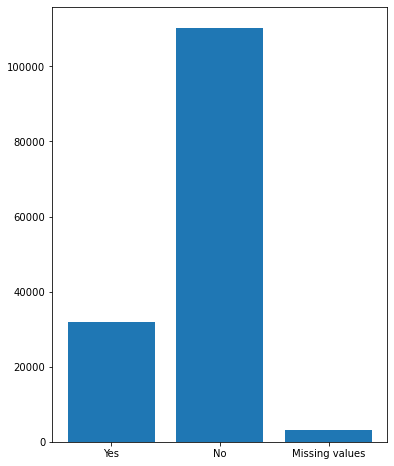

In [59]:
plt.ax =plt.subplots(figsize=(6,8))
names = list(RainToday.keys())
values = list(RainToday.values())

plt.bar(range(len(RainToday)), values, tick_label=names)
plt.show()

In [60]:
df['RainToday']=df['RainToday'].fillna(0)
df['RainToday'].isnull().sum()

0

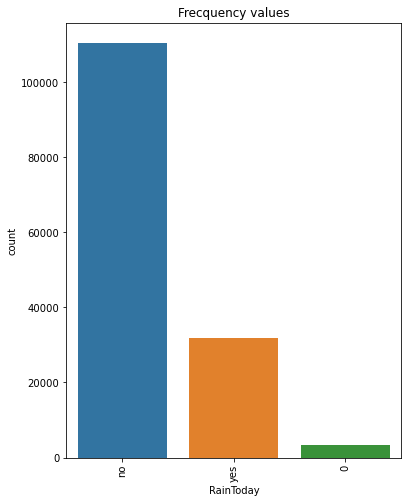

In [61]:
plt.ax =plt.subplots(figsize=(6,8))
ax=sns.countplot(x='RainToday',data=df)
plt.xticks(rotation=90)
plt.title('Frecquency values');

In [62]:
df['RainToday']=df['RainToday'].replace('no',0)
df['RainToday']=df['RainToday'].replace('yes',1)

In [63]:
cf_matrix = confusion_matrix(df['RainToday'], df['RainTomorrow']) 
cf_matrix

array([[96299, 17281],
       [17283, 14597]], dtype=int64)

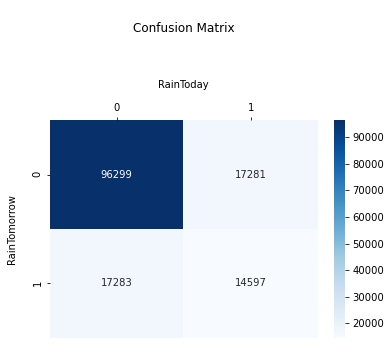

In [64]:
ax = sns.heatmap(cf_matrix, annot=True, 
            fmt='1', cmap='Blues')

ax.set_title('\nConfusion Matrix\n\n');
ax.set_xlabel('\nRainToday\n') 
ax.xaxis.set_label_position('top')
ax.set_ylabel('RainTomorrow\n');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.xaxis.tick_top() 
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

Text(0, 0.5, 'WindSpeed3pm')

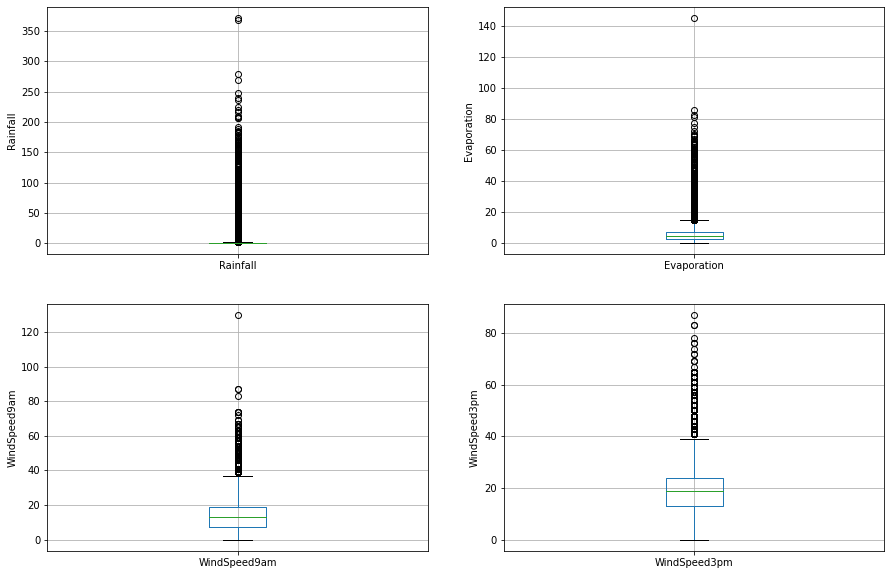

In [65]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')


In [66]:
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 86 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   MinTemp                    145460 non-null  float64
 1   MaxTemp                    145460 non-null  float64
 2   Rainfall                   145460 non-null  float64
 3   Evaporation                145460 non-null  float64
 4   Sunshine                   145460 non-null  float64
 5   WindGustSpeed              145460 non-null  float64
 6   WindSpeed9am               145460 non-null  float64
 7   WindSpeed3pm               145460 non-null  float64
 8   Humidity9am                145460 non-null  float64
 9   Humidity3pm                145460 non-null  float64
 10  Pressure9am                145460 non-null  float64
 11  Pressure3pm                145460 non-null  float64
 12  Cloud9am                   145460 non-null  float64
 13  Cloud3pm                   14

In [67]:
df.duplicated().sum()

0

In [68]:
df.drop_duplicates(inplace = True)

In [69]:
x = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [70]:
LogisticRegressionPipeline = Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=3)),
                     ('logistic_classifier',LogisticRegression())])

In [71]:
DecisionTreePipeline = Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=3)),
                     ('decisiontree_classifier',DecisionTreeClassifier())])

In [72]:
RandomForestPipeline = Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=3)),
                     ('randomforest_classifier',RandomForestClassifier())])

In [73]:
The_Pipelined_Models = [LogisticRegressionPipeline, DecisionTreePipeline, RandomForestPipeline]

In [74]:
#df = df.reset_index()
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir9am_E,WindDir9am_N,WindDir9am_S,WindDir9am_W,WindDir9am_n,WindDir3pm_E,WindDir3pm_N,WindDir3pm_S,WindDir3pm_W,WindDir3pm_n
0,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,...,0,0,0,1,0,0,0,0,1,0
1,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,...,0,1,0,0,0,0,0,0,1,0
2,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,...,0,0,0,1,0,0,0,0,1,0
3,9.2,28.0,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,...,0,0,1,0,0,1,0,0,0,0
4,17.5,32.3,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,...,1,0,0,0,0,0,1,0,0,0


In [75]:
PipelineDict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest'}

for pipe in The_Pipelined_Models:
    pipe.fit(X_train, y_train)

In [76]:
for i,model in enumerate(The_Pipelined_Models):
    print("{} Test Accuracy: {}".format(PipelineDict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy: 0.7811769558641551
Decision Tree Test Accuracy: 0.7318163068884916
Random Forest Test Accuracy: 0.7955107933452495


In [77]:
obj = RandomForestClassifier()
obj.fit(X_train, y_train)
preds = obj.predict(X_test)
cf_matrix = confusion_matrix(y_test, preds) 
cf_matrix

array([[21800,   926],
       [ 3270,  3096]], dtype=int64)

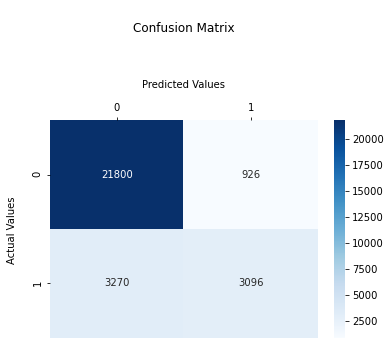

In [78]:
ax = sns.heatmap(cf_matrix, annot=True, 
            fmt='1', cmap='Blues')
ax.set_title('\nConfusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values\n') 
ax.xaxis.set_label_position('top')
ax.set_ylabel('Actual Values \n');
ax.xaxis.set_ticklabels(['0','1'])
ax.xaxis.tick_top() 
ax.yaxis.set_ticklabels(['0','1'])
plt.show()

In [79]:
MAEValue = mean_absolute_error(y_test, preds, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)


#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, preds, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

Mean Absolute Error Value is :  0.14423209129657638
Mean Squared Error Value is :  0.14423209129657638


In [81]:
for k in range(10,300,30):
    RandomForestRegressorModel = RandomForestClassifier(n_estimators=k,max_depth=4, random_state=33)
    RandomForestRegressorModel.fit(X_train, y_train)
    print(f"at {k} trees:")
    print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train))
    print('Random Forest Regressor Test Score  is : ' , RandomForestRegressorModel.score(X_test, y_test))
    print("\n")

at 10 trees:
Random Forest Regressor Train Score is :  0.8206637563591366
Random Forest Regressor Test Score  is :  0.8190567853705486


at 40 trees:
Random Forest Regressor Train Score is :  0.8140382235666163
Random Forest Regressor Test Score  is :  0.8139694761446445


at 70 trees:
Random Forest Regressor Train Score is :  0.8165732847518218
Random Forest Regressor Test Score  is :  0.8155850405609789


at 100 trees:
Random Forest Regressor Train Score is :  0.8163670424859067
Random Forest Regressor Test Score  is :  0.8154131720060498


at 130 trees:
Random Forest Regressor Train Score is :  0.8146741372198543
Random Forest Regressor Test Score  is :  0.8145194555204179


at 160 trees:
Random Forest Regressor Train Score is :  0.8154905128557679
Random Forest Regressor Test Score  is :  0.814313213254503


at 190 trees:
Random Forest Regressor Train Score is :  0.8158944039598515
Random Forest Regressor Test Score  is :  0.8148975663412622


at 220 trees:
Random Forest Regressor 

In [83]:
search_space = {
    "n_estimators" : [100, 200, 500,600],
    "max_depth" : [3, 6, 9],
}

In [85]:
from sklearn.model_selection import GridSearchCV
# make a GridSearchCV object
GS = GridSearchCV(estimator = obj,
                  param_grid = search_space, 
                  scoring = ["r2", "neg_root_mean_squared_error"], #sklearn.metrics.SCORERS.keys() #comparing the 45 models.
                  refit = "r2", #seleting the best model. i - error square/total square
                  cv = 5, #shuffling data.
                  verbose = 4) #shwoing 4 params.

In [87]:
GS.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-0.452) r2: (test=-0.191) total time=   2.5s
[CV 2/5] END max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-0.445) r2: (test=-0.158) total time=   2.5s
[CV 3/5] END max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-0.448) r2: (test=-0.172) total time=   2.5s
[CV 4/5] END max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-0.442) r2: (test=-0.140) total time=   2.5s
[CV 5/5] END max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-0.446) r2: (test=-0.162) total time=   2.5s
[CV 1/5] END max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.443) r2: (test=-0.149) total time=   4.9s
[CV 2/5] END max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.444) r2: (test=-0.150) total time=   5.1s
[CV 3/5] END max_depth=3, n_estimators=200; neg_root_mean_squared_error

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9],
                         'n_estimators': [100, 200, 500, 600]},
             refit='r2', scoring=['r2', 'neg_root_mean_squared_error'],
             verbose=4)

In [88]:
print(GS.best_estimator_) # to get the complete details of the best model

RandomForestClassifier(max_depth=9, n_estimators=600)


In [89]:
print(GS.best_params_) # to get only the best hyperparameter values that we searched for

{'max_depth': 9, 'n_estimators': 600}


In [90]:
print(GS.best_score_) # score according to the metric we passed in refit

0.0871465532928896


In [91]:
df = pd.DataFrame(GS.cv_results_)
df = df.sort_values("rank_test_r2")
df.to_csv("cv_results.csv", index = False)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_r2,split1_test_r2,split2_test_r2,...,std_test_r2,rank_test_r2,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
11,42.753024,0.647739,1.165408,0.066236,9,600,"{'max_depth': 9, 'n_estimators': 600}",0.093654,0.084116,0.103065,...,0.013016,1,-0.393893,-0.395960,-0.391815,-0.400232,-0.394501,-0.395280,0.002811,1
10,35.843339,0.564595,0.989435,0.060640,9,500,"{'max_depth': 9, 'n_estimators': 500}",0.095662,0.086375,0.095785,...,0.011585,2,-0.393456,-0.395471,-0.393402,-0.400178,-0.394664,-0.395434,0.002496,2
9,14.096484,0.406996,0.388497,0.025407,9,200,"{'max_depth': 9, 'n_estimators': 200}",0.093152,0.080853,0.097040,...,0.010957,3,-0.394002,-0.396665,-0.393129,-0.399641,-0.394229,-0.395533,0.002366,3
8,7.020375,0.030050,0.200452,0.009606,9,100,"{'max_depth': 9, 'n_estimators': 100}",0.089387,0.082359,0.092522,...,0.008403,4,-0.394819,-0.396340,-0.394111,-0.399103,-0.394610,-0.395797,0.001813,4
7,27.996601,0.576966,0.760171,0.009658,6,600,"{'max_depth': 6, 'n_estimators': 600}",0.027642,0.021367,0.043069,...,0.010737,5,-0.407985,-0.409299,-0.404707,-0.411455,-0.406992,-0.408088,0.002256,5
5,9.328897,0.307081,0.254423,0.002530,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.025885,0.016598,0.041312,...,0.011602,6,-0.408354,-0.410295,-0.405079,-0.411820,-0.406570,-0.408423,0.002436,6
6,24.493962,1.053809,0.684703,0.014842,6,500,"{'max_depth': 6, 'n_estimators': 500}",0.012080,0.019108,0.046332,...,0.014105,7,-0.411237,-0.409772,-0.404017,-0.412341,-0.407467,-0.408967,0.002965,7
4,4.764019,0.113152,0.134545,0.001892,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.005805,0.005554,0.041060,...,0.015039,8,-0.412541,-0.412593,-0.405132,-0.410828,-0.406305,-0.409480,0.003158,8
3,15.015552,0.194659,0.549053,0.026634,3,600,"{'max_depth': 3, 'n_estimators': 600}",-0.164119,-0.152573,-0.163028,...,0.005056,9,-0.446406,-0.444187,-0.446165,-0.444244,-0.444535,-0.445107,0.000972,9
2,12.723312,0.400265,0.458395,0.016637,3,500,"{'max_depth': 3, 'n_estimators': 500}",-0.172402,-0.166127,-0.156501,...,0.010361,10,-0.447991,-0.446791,-0.444911,-0.444535,-0.442160,-0.445278,0.002003,10
